# Gun Terrorism - Stochastic Math Model

### Initialization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as scipy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Loop 

In [3]:
def simulate(g,n):
    t = 0 
    tfinal = 200
    alive = True
    fireRate = 10 ##shots per second
    a = 0 ##armed citizens  
    potential_a = int(n*g)
    
    ##Determine Armed Citizens
    for i in range(0,potential_a):
        if (np.random.rand()> g/2):
            a = a+1
    u = n-a ##unarmed citizens  
    
    ##Calculate probability attacker kills attacked
    def calc_d_prob(a,u):
        ##(np.random.rand()/2+0.5)
        d = 0.8/(1+5*e**(-0.1*(u+a)))*(g/(1+g)+0.4)+0.2
        #print('DEATH PROB =',d)
        return d
    
    att_p = calc_d_prob(a,u) ##probability of armed attacker to kill a civilian
    u_p = 0.05*g/(1+g) ##prob. of armed civilian to kill attacker
    
    tplot = np.asarray([t])
    uplot = np.asarray([u])
    aplot = np.asarray([a])
    totalplot =np.asarray([a+u])
    
    def kill_civilian(a,u): ##return 1 for armed civilian killed
        ran = np.random.rand()
        #print(ran, a/(a+u))
        if (ran)<(a/(a+u)):
            return 1
        return 0
    #print(a,u)
    
    ##open fire 
    t=1
    while t< fireRate and u+a>0:
        if (att_p>np.random.rand()):
            #print(a,u)
            if (a>0 and kill_civilian(a,u) == 1):
                a = a-1
            else:
                u = u-1
        tplot = np.append(tplot, t)
        uplot = np.append(uplot, u)
        aplot = np.append(aplot, a)
        totalplot =np.append(totalplot,a+u)
        t=t+1

    while (t < tfinal and alive and (a+u)>0):
        att_p = calc_d_prob(a,u)
        if (att_p>np.random.rand()):
            if (kill_civilian(a,u) == 1):
                a = a-1
            else:
                u = u -1
        
        tplot = np.append(tplot, t)
        uplot = np.append(uplot, u)
        aplot = np.append(aplot, a)
        totalplot =np.append(totalplot,a+u)
        
        ##attacker is shot back at
        if (u_p*a > np.random.rand()):
           # print("SHOT")
            alive = False
            
        t = t+1
#     plt.figure()
#     plt.plot(tplot, uplot, 'g*', label ='Unarmed Civilians')
#     plt.plot(tplot, aplot, 'r*', label ='Armed Civilians')  
#     plt.plot(tplot,totalplot,'b*',label ='Total Civilians')
#     plt.title('Mass Shooting')
#     plt.xlabel('Time')
#     plt.ylabel('Civilians')
#     plt.legend()
#     plt.axis([0, 200, 0, n])
   # print ((n-(a+u))/n)
    return (n-(a+u))/n


### Simulate 

In [4]:
## Simulate with g = 0.5, N = 10
print(simulate(0.01, 100))

0.11


In [5]:
simulate(0,50)

1.0

0.744086784711 41.5343616897


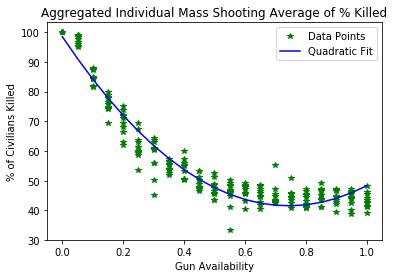

In [61]:
# no_gunplot = np.asarray([])
# for i in range(5,50):
#     no_gunplot = np.append(no_gunplot,simulate(0.2,i))
# half_gunplot = np.asarray([])
# for i in range(5,50):
#     half_gunplot = np.append(half_gunplot,simulate(0.5,i))
# all_gunplot = np.asarray([])
# for i in range(5,50):
#     all_gunplot = np.append(all_gunplot,simulate(1,i))

#def gen_weight_arr(n, center):
    

weighted_avg = np.asarray([])
t_weight = np.asarray([])
for i in range(0,21):
    for k in range (0,11):
        total_avg = 0
        for j in range(5,51):
            total_avg = total_avg + simulate(i/20,j)
        t_weight = np.append(t_weight,i/20)    
        weighted_avg = np.append(weighted_avg, total_avg/46)
weighted_avg = weighted_avg*100
x2,x1,x0 = np.polyfit(t_weight, weighted_avg, 2)
# X = np.asarray([np.ones(np.size(t_weight)), t_weight]).transpose()
# m,c = np.linalg.lstsq(X, np.log(weighted_avg))[0]
# print(m,c)

# gun_sim = np.asarray([]) 
# t_sim = np.asarray([])
# for i in range(0,11):
#     for j in range(5,51):
#         for k in range (0,11):
#             gun_sim = np.append(gun_sim, simulate(i/10,j))
#             t_sim = np.append(t_sim, i/10)
    
plt.figure()
plt.plot(t_weight, weighted_avg, 'g*', label = 'Data Points')
#lse_weight = e**(m*t_weight) + np.log(-c)
#plt.plot(t_weight,lse_weight,'-b')
poly_weight = x2*t_weight**2+x1*t_weight+x0
min_x = -x1/(2*x2)
print(min_x, x2*min_x**2+x1*min_x+x0)
plt.plot(t_weight,poly_weight,'-b', label = 'Quadratic Fit')
plt.title('Aggregated Individual Mass Shooting Average of % Killed')
plt.xlabel('Gun Availability')
plt.ylabel('% of Civilians Killed')
plt.legend()
#plt.axis([-.05,1,0,1.2])

In [4]:
def sim(g,n):
    #print(n)
    t = 0 
    tfinal = 200
    alive = True
    fireRate = 10 ##shots per second
    a = 0 ##armed citizens  
    potential_a = int(n*g)
    
    ##Determine Armed Citizens
    for i in range(0,potential_a):
        if (np.random.rand()> g/2):
            a = a+1
    u = n-a ##unarmed citizens  
    
    ##Calculate probability attacker kills attacked
    def calc_d_prob(a,u):
        ##(np.random.rand()/2+0.5)
        d = 0.8/(1+5*e**(-0.1*(u+a)))*(g/(1+g)+0.4)+0.2
        #print('DEATH PROB =',d)
        return d
    
    att_p = calc_d_prob(a,u) ##probability of armed attacker to kill a civilian
    u_p = 0.05*g/(1+g) ##prob. of armed civilian to kill attacker
    
    tplot = np.asarray([t])
    uplot = np.asarray([u])
    aplot = np.asarray([a])
    totalplot =np.asarray([a+u])
    
    def kill_civilian(a,u): ##return 1 for armed civilian killed
        ran = np.random.rand()
        #print(ran, a/(a+u))
        if (ran)<(a/(a+u)):
            return 1
        return 0
    #print(a,u)
    
    ##open fire 
    t=1
    while t< fireRate and u+a>0:
        if (att_p>np.random.rand()):
            #print(a,u)
            if (a>0 and kill_civilian(a,u) == 1):
                a = a-1
            else:
                u = u-1
        tplot = np.append(tplot, t)
        uplot = np.append(uplot, u)
        aplot = np.append(aplot, a)
        totalplot =np.append(totalplot,a+u)
        t=t+1

    while (t < tfinal and alive and (a+u)>0):
        att_p = calc_d_prob(a,u)
        if (att_p>np.random.rand()):
            if (kill_civilian(a,u) == 1):
                a = a-1
            else:
                u = u -1
        
        tplot = np.append(tplot, t)
        uplot = np.append(uplot, u)
        aplot = np.append(aplot, a)
        totalplot =np.append(totalplot,a+u)
        
        ##attacker is shot back at
        if (u_p*a > np.random.rand()):
           # print("SHOT")
            alive = False
            
        t = t+1
    return n-(a+u)

0.714662208209 8.1680121756
36.1965545964 -51.7366192748 26.6551154637


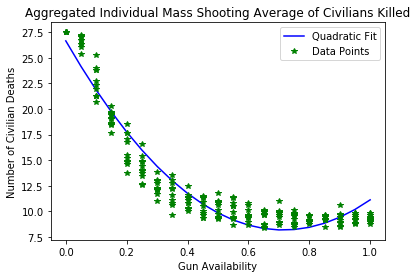

In [59]:
# y_fit = np.asarray([])
# t_fit = np.asarray([])
# for i in range (0,10001):
#     y_fit = np.append(y_fit, sim(i/10000,25))
#     t_fit = np.append(t_fit, i/10000)

y_fit = np.asarray([])
t_fit = np.asarray([])
for i in range(0,21):
    for k in range (0,11):
        total_avg = 0
        for j in range(5,51):
            total_avg = total_avg + sim(i/20,j)
        t_fit = np.append(t_fit,i/20)    
        y_fit = np.append(y_fit, total_avg/46)

x2,x1,x0 = np.polyfit(t_fit, y_fit, 2)
poly_fit = x2*t_fit**2+x1*t_fit+x0
min_x = -x1/(2*x2)
print(min_x, x2*min_x**2+x1*min_x+x0)
print(x2,x1,x0)
plt.figure()
plt.plot(t_fit,poly_fit,'-b', label = 'Quadratic Fit')
plt.plot(t_fit, y_fit, 'g*', label = 'Data Points')
plt.title('Aggregated Individual Mass Shooting Average of Civilians Killed')
plt.xlabel('Gun Availability')
plt.ylabel('Number of Civilian Deaths')
plt.legend()

In [53]:
h=0.018
def f(t):
    n = 1/(1+e**(-t/50))-0.5
    #print(n)
    return n
# def d(x):
#     n = 1/(1+0.5*e**(-1.25*x+1.25))
#     print(n)
#     return n
def d(t):
    return 0.8+0.2*t
def sim_year(g):
    counter=0
    z = g+h*(1-g) #criminal availability to guns
    f_0 = sim(g,25)
    F = np.asarray([f_0]) #total number of dead civilians from mass shootings
    shooter_death_frac = f_0/25
    #print(shooter_death_frac)
    int_F = np.asarray([F[counter]])
    counter = counter +1
    #initial mass shooting at t=0
    t = np.asarray([0])
    for i in range(1,365):
        if (z*f(int_F[counter-1])>np.random.rand()): 
            n = (int)(7.5*(np.random.randn())+20)
            if (n<4):
                n=4
            F_t = sim(g,n)
            #print(F_t/n,F_t)
            F = np.append(F,F_t)
            shooter_death_frac = (shooter_death_frac*counter+(F_t/n))/(counter+1)
            #print(shooter_death_frac)
            int_F = np.append(int_F,int_F[counter-1]+F[counter])
            t = np.append(t,i)
            counter = counter +1
#     plt.figure()
#     plt.plot(t,F,'g*', label ='Victims per attack')
#     plt.plot(t,int_F,'b*', label ='Total Victims')
#     plt.title('Simulated Attacks over 1 year')
#     plt.xlabel('Days of the Year')
#     plt.ylabel('Number of Victims')
#     plt.legend()
    return int_F[counter-1]
     

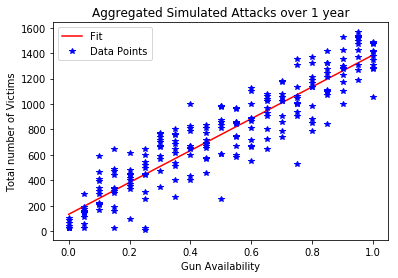

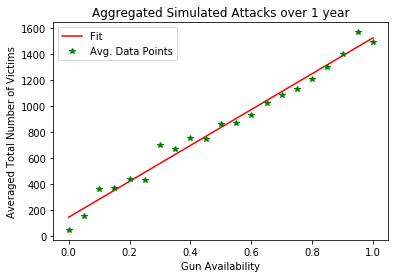

In [52]:
t_year = np.asarray([])
agg_att = np.asarray([])
agg_avg_att = np.asarray([])
t_avg = np.asarray([])
for i in range(0,21):
    agg_avg_att = np.append(agg_avg_att, 0)
    t_avg = np.append(t_avg,i/20)
    for j in range(0,11):
        sim_ij = sim_year(i/20)
        agg_att = np.append(agg_att,sim_ij)
        t_year = np.append(t_year, i/20)
        agg_avg_att[i]=agg_avg_att[i]+sim_ij
    agg_avg_att[i] = agg_avg_att[i]/10

t_X = np.vstack([t_year, np.ones(len(t_year))]).T
m,c = np.linalg.lstsq(t_X, agg_att)[0]
plt.figure()
plt.plot(t_year,m*t_year+c,'-r', label ='Fit')
plt.plot(t_year,agg_att,'b*', label ='Data Points')
plt.title('Aggregated Simulated Attacks over 1 year')
plt.xlabel('Gun Availability')
plt.ylabel('Total number of Victims')  
plt.legend()


t_X_avg = np.vstack([t_avg, np.ones(len(t_avg))]).T
d,v = np.linalg.lstsq(t_X_avg, agg_avg_att)[0]
plt.figure()
plt.plot(t_avg,d*t_avg+v,'-r', label = 'Fit')
plt.plot(t_avg,agg_avg_att,'g*', label = 'Avg. Data Points')
plt.title('Aggregated Simulated Attacks over 1 year')
plt.xlabel('Gun Availability')
plt.ylabel('Averaged Total Number of Victims')
plt.legend()

/Users/37138/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0,0.5,'Total number of Victims')

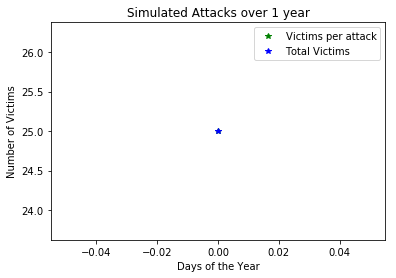

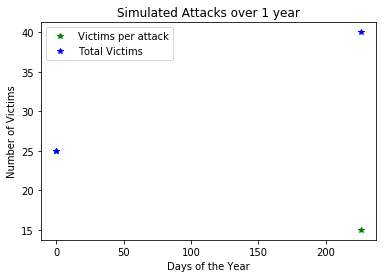

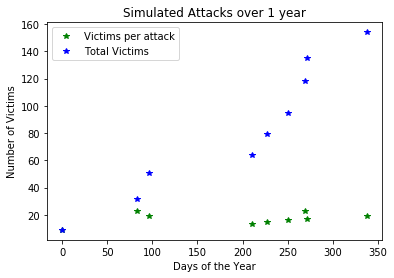

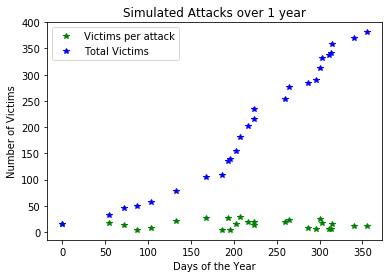

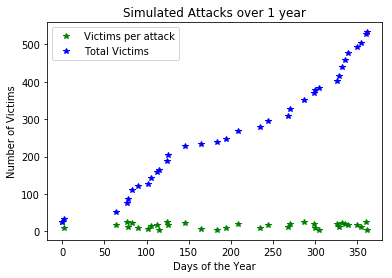

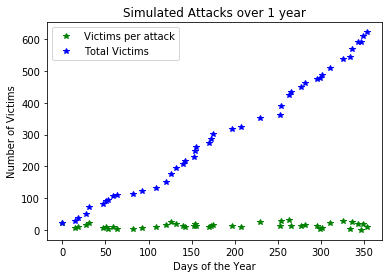

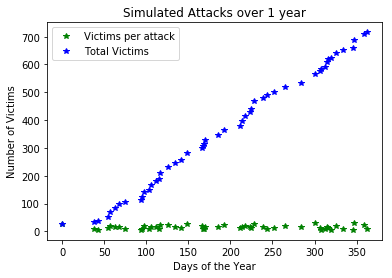

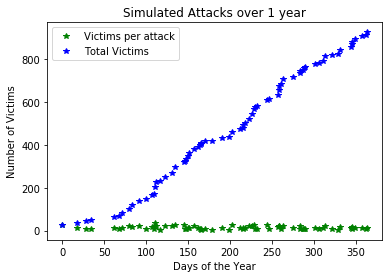

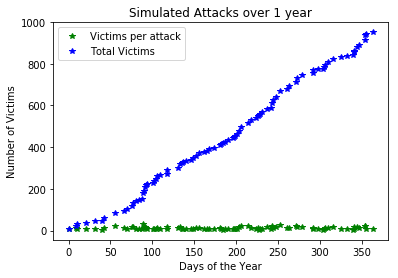

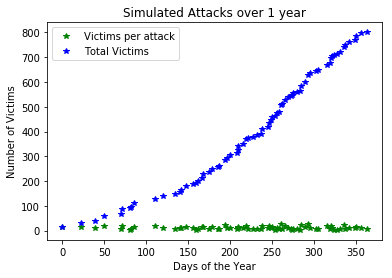

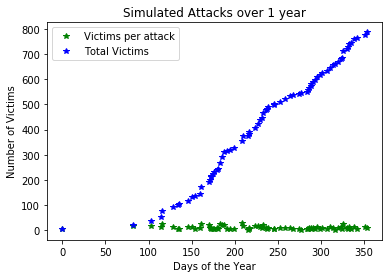

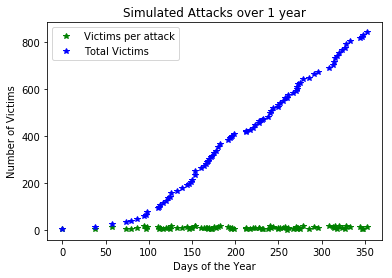

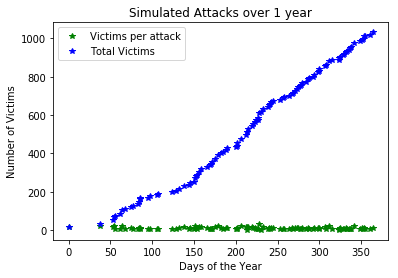

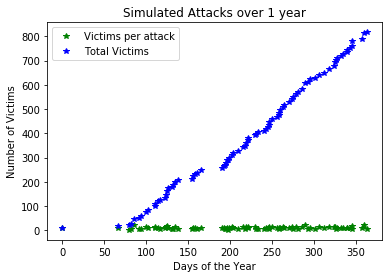

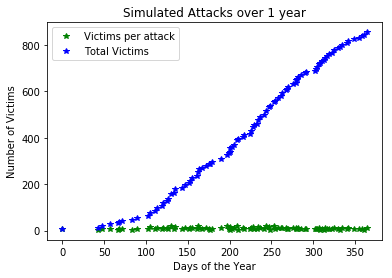

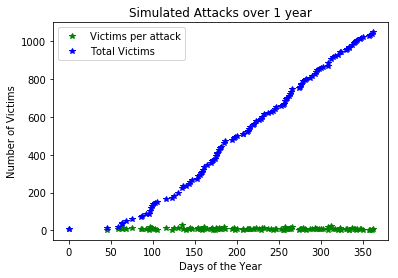

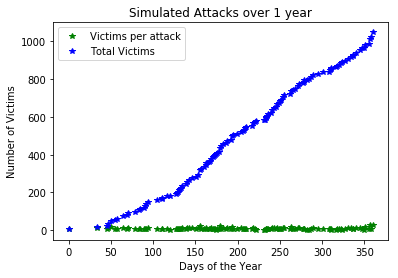

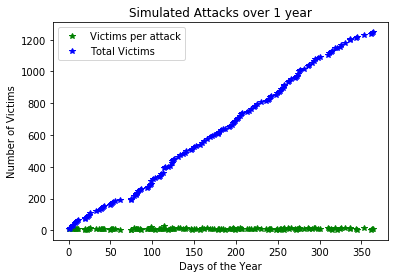

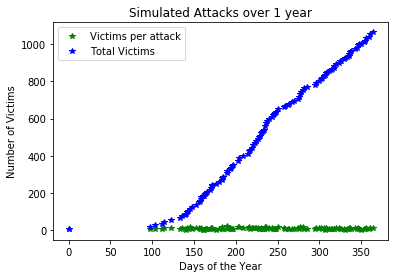

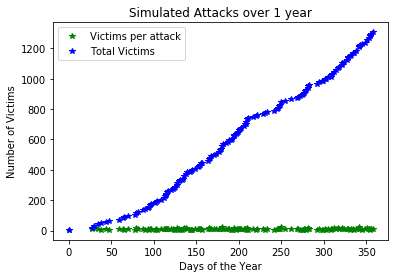

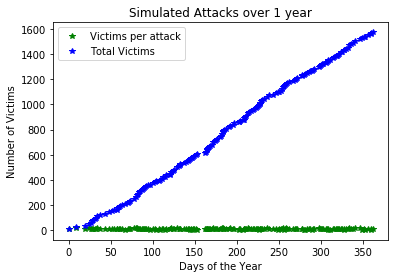

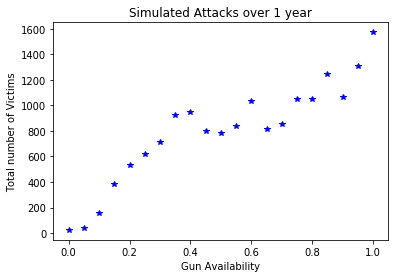

In [54]:
t_year = np.asarray([])
agg_att = np.asarray([])
for i in range(0,21):
    agg_att = np.append(agg_att,sim_year(i/20))
    t_year = np.append(t_year, i/20)
plt.figure()
plt.plot(t_year,agg_att,'b*')
plt.title('Simulated Attacks over 1 year')
plt.xlabel('Gun Availability')
plt.ylabel('Total number of Victims')  

1345.05649388 84.3529411765
-2.97108922405 -1593.99322804
193.75135686 1151.30513702 116.321915058


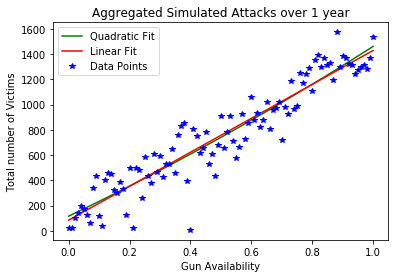

In [50]:
gun_av = np.asarray([])
agg_att = np.asarray([])
for i in range(0,101):
    agg_att = np.append(agg_att,sim_year(i/100))
    gun_av = np.append(gun_av, i/100)

#Regressions
x_gun = np.vstack([gun_av, np.ones(len(gun_av))]).T
m,c = np.linalg.lstsq(x_gun, agg_att)[0]
print(m,c)

x2,x1,x0 = np.polyfit(gun_av, agg_att, 2)
poly_fit = x2*gun_av**2+x1*gun_av+x0
min_x = -x1/(2*x2)
print(min_x, x2*min_x**2+x1*min_x+x0)
print(x2,x1,x0)

plt.figure()
plt.plot(gun_av,poly_fit,'-g', label = 'Quadratic Fit')
plt.plot(gun_av,m*gun_av+c,'-r', label='Linear Fit')
plt.plot(gun_av,agg_att,'b*', label ='Data Points')
plt.title('Aggregated Simulated Attacks over 1 year')
plt.xlabel('Gun Availability')
plt.ylabel('Total number of Victims') 
plt.legend()